In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D,MaxPooling2D,Flatten,Dropout

In [2]:
from tensorflow.keras.preprocessing .image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255 ,shear_range = 0.1,zoom_range = 0.1,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
# Train-Test Split  RUN ONLY ONCE
import splitfolders
splitfolders.ratio(r'D:\AI Course\Final Project\Brain MRI\brain_tumor_dataset', output=r"D:\AI Course\Final Project\Brain MRI\brain_tumor_dataset\brain_tumor_dataset_split", ratio=(0.8, 0.2))

Copying files: 253 files [00:00, 1155.90 files/s]


In [3]:
x_train = train_datagen.flow_from_directory(r'D:\AI Course\Final Project\Brain MRI\brain_tumor_dataset\brain_tumor_dataset_split\train',target_size = (256,256),batch_size = 20,class_mode = "binary")
x_test = test_datagen.flow_from_directory(r'D:\AI Course\Final Project\Brain MRI\brain_tumor_dataset\brain_tumor_dataset_split\val',target_size = (256,256),batch_size = 20,class_mode = "binary")

Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [4]:
x_train

In [5]:
x_train.class_indices

{'no': 0, 'yes': 1}

In [6]:
x_test.class_indices

{'no': 0, 'yes': 1}

In [7]:
len(x_test)

3

In [8]:
len(x_train)

11

In [21]:
model = Sequential()

In [22]:
model.add(Convolution2D(32,(3,3),input_shape = (256,256,3)))

In [23]:
model.add(MaxPooling2D((3,3)))

In [24]:
model.add(Dropout(0.2))

In [25]:
model.add(Flatten())

In [26]:
model.add(Dense(units = 256, kernel_initializer= "random_uniform",activation = "relu"))

In [27]:
model.add(Dropout(0.25))

In [28]:
model.add(Dense(units = 256, kernel_initializer= "random_uniform",activation = "relu"))

In [29]:
model.add(Dropout(0.1))

In [30]:
model.add(Dense(units = 1 , kernel_initializer= "random_uniform",activation = "sigmoid"))

In [31]:
model.compile(optimizer= "adam",loss = "binary_crossentropy" , metrics =["accuracy"])

In [32]:
model.fit(x_train,steps_per_epoch =8 , epochs = 30 , validation_data = x_test,validation_steps = 3 )

Epoch 1/30
8/8 [==============================] - 7s 735ms/step - loss: 1.7707 - accuracy: 0.5845 - val_loss: 1.1183 - val_accuracy: 0.6078
Epoch 2/30
8/8 [==============================] - 6s 705ms/step - loss: 0.7826 - accuracy: 0.5704 - val_loss: 0.6946 - val_accuracy: 0.4314
Epoch 3/30
8/8 [==============================] - 6s 713ms/step - loss: 0.6471 - accuracy: 0.6479 - val_loss: 0.5585 - val_accuracy: 0.6471
Epoch 4/30
8/8 [==============================] - 6s 741ms/step - loss: 0.5351 - accuracy: 0.7250 - val_loss: 0.5359 - val_accuracy: 0.6863
Epoch 5/30
8/8 [==============================] - 6s 745ms/step - loss: 0.5696 - accuracy: 0.7312 - val_loss: 0.5464 - val_accuracy: 0.6471
Epoch 6/30
8/8 [==============================] - 6s 703ms/step - loss: 0.6622 - accuracy: 0.6549 - val_loss: 0.5623 - val_accuracy: 0.7451
Epoch 7/30
8/8 [==============================] - 7s 810ms/step - loss: 0.5810 - accuracy: 0.7606 - val_loss: 0.5729 - val_accuracy: 0.7647
Epoch 8/30
8/8 [====

In [164]:
model.save("Brain_Tumor5.h5")

###  Testing

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing  import image
import numpy as np

In [25]:
model = load_model (r"D:\AI Course\Final Project\Brain_Tumor5.h5")

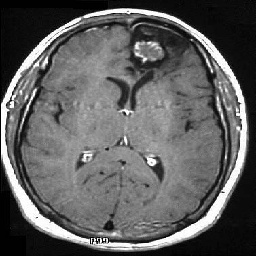

In [34]:
img = image.load_img(r"D:\AI Course\Final Project\Brain MRI\yes\Y12.jpg",target_size = (256,256))
img

In [35]:
x = image.img_to_array(img)

In [36]:
x.shape

(256, 256, 3)

In [37]:
x = np.expand_dims(x,axis = 0)

In [38]:
pred = model.predict(x)

In [39]:
pred

array([[1.]], dtype=float32)

In [40]:
pred>0.5

array([[ True]])

In [41]:
#D:\AI Course\Final Project\Brain MRI\no\No19.jpg  NO

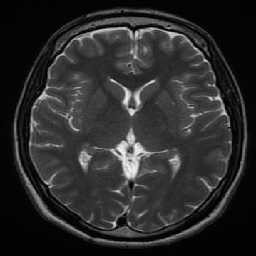

In [42]:
img2 = image.load_img(r"D:\AI Course\Final Project\Brain MRI\no\No22.jpg",target_size = (256,256))
img2

In [43]:
x2 = image.img_to_array(img2)

In [44]:
x2.shape

(256, 256, 3)

In [45]:
x2 = np.expand_dims(x2,axis = 0)

In [46]:
pred2 = model.predict(x2)

In [47]:
pred2

array([[0.]], dtype=float32)

In [48]:
pred2>0.5

array([[False]])

In [49]:
model.evaluate(x_train)

11/11 [==============================] - 3s 301ms/step - loss: 0.2384 - accuracy: 0.9109


[0.23844987154006958, 0.9108911156654358]

In [50]:
model.evaluate(x_test)

3/3 [==============================] - 0s 112ms/step - loss: 0.5621 - accuracy: 0.8235


[0.5621210336685181, 0.8235294222831726]

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 84, 84, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 225792)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               57803008  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              